# Boat Sales: Regression Analysis


## Table of Contents

#### 1. Importing Libraries and data
#### 2. Data Cleaning
#### 3. Data Preparation - Regression Analysis
#### 4. Regression Analysis

### 01. Importing Libraries and Data

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# define path 

path = r''

In [18]:
# importing dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'categorical_variables_Boat_Sales.pkl'))

### 02. Data Consistency

##### Columns 

In [19]:
# columns

df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_7_days', 'Country', 'Amount_US', 'Visit_Rate',
       'Year_Built_Group'],
      dtype='object')

In [20]:
for i in df["Country"].unique():
  print(i)

Germany
Switzerland
Italy
France
Spain
Austria
Netherlands
Serbia
Slovakia
Croatia
Portugal
Montenegro
Belgium
Slovenia
Denmark
United Kingdom
Greece
Poland
Turkey
België,
Hungary
Cyprus
Finland
Sweden
Malta
Estonia
Monaco
Russia
Egypt
Australia
Bulgaria
Taiwan
Thailand
Latvia
Ireland
Seychelles
Morocco
Lebanon
Czech Republic
Lithuania
Romania


In [21]:
# check first 10 rows

df.head(10)

,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Views_7_days,Country,Amount_US,Visit_Rate,Year_Built_Group
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,3839.0,Low,2002-2021
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,3738.9,Low,2002-2021
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,525.0,High,1982-2001
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,3850.0,Low,2002-2021
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,690.0,Middle,2002-2021
5,Fishing Boat,Italmarine power boats,"Used boat,Unleaded",1997,3.72,1.33,Aluminium,413,Switzerland,675.0,High,1982-2001
6,Pilothouse,BÃ©nÃ©teau power boats,"Used boat,Diesel",1981,8.00,2.84,PVC,265,France,4400.0,High,1962-1981
7,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,69,Germany,4398.9,Low,2002-2021
8,Sport Boat,Linder power boats,"new boat from stock,Unleaded",2020,4.31,1.64,Aluminium,90,Germany,4323.0,Low,2002-2021
9,Sport Boat,Kammin power boats,"Used boat,Unleaded",1979,5.60,2.10,GRP,98,Germany,4290.0,Low,1962-1981


In [22]:
# check dataframe shape 

df.shape

(6607, 12)

##### Missing Values 

In [23]:
# check missing values

df.isnull().sum()

Boat_Type           0
Manufacturer        0
Type                0
Year_Built          0
Length              0
Width               0
Material            0
Views_7_days        0
Country             0
Amount_US           0
Visit_Rate          0
Year_Built_Group    0
dtype: int64

##### Duplicate Values 

In [24]:
# check for duplicates in the dataframe

df.duplicated().value_counts()

False    6607
Name: count, dtype: int64

##### Extreme values checks

<Axes: xlabel='Views_7_days', ylabel='Count'>

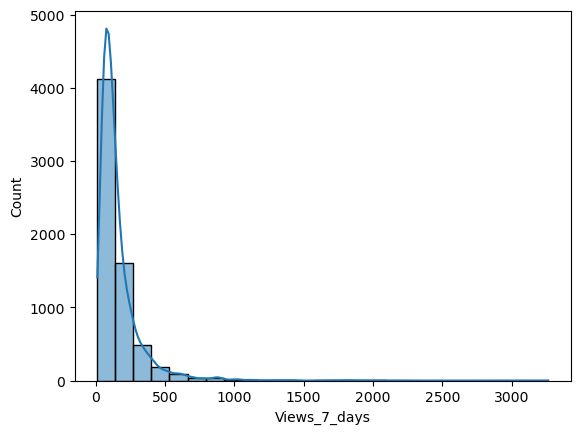

In [25]:
# histogram to visualize extreme values - Year that was built

sns.histplot(df['Views_7_days'], bins=25, kde = True) 

In [26]:
# check dataframe average

df['Views_7_days'].mean()

162.0112002421674

In [27]:
# check dataframe median

df['Views_7_days'].median()

113.0

In [28]:
# check dataframe max

df['Views_7_days'].max()

3263

In [29]:
# check dataframe min

df['Views_7_days'].min()

13

### 3. Data Preparation - Regression Analysis

In [30]:
# columns

# Ps: changing of a factor(s), X, causes a dependent variable, y, to also change in a predictable way

df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_7_days', 'Country', 'Amount_US', 'Visit_Rate',
       'Year_Built_Group'],
      dtype='object')

In [31]:
df[['Amount_US','Year_Built','Views_7_days','Length','Width']].corr()

,Amount_US,Year_Built,Views_7_days,Length,Width
Amount_US,1.000000,0.120260,-0.060170,0.609389,0.533574
Year_Built,0.120260,1.000000,-0.194199,-0.091224,-0.077697
Views_7_days,-0.060170,-0.194199,1.000000,-0.168280,-0.185154
Length,0.609389,-0.091224,-0.168280,1.000000,0.917885
Width,0.533574,-0.077697,-0.185154,0.917885,1.000000


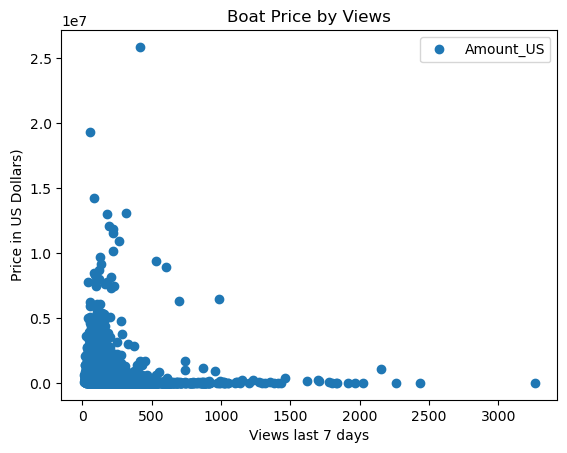

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Views_7_days', y='Amount_US',style='o') 
plt.title('Boat Price by Views')  
plt.xlabel('Views last 7 days')  
plt.ylabel('Price in US Dollars)')  
plt.show()

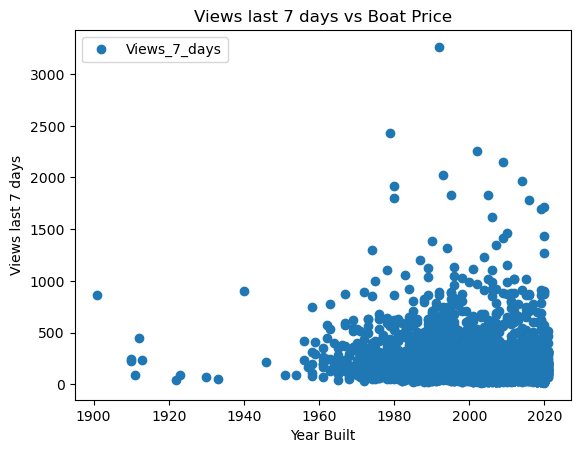

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_Built', y='Views_7_days',style='o')
plt.title('Views last 7 days vs Boat Price')  
plt.xlabel('Year Built')  
plt.ylabel('Views last 7 days')  
plt.show()

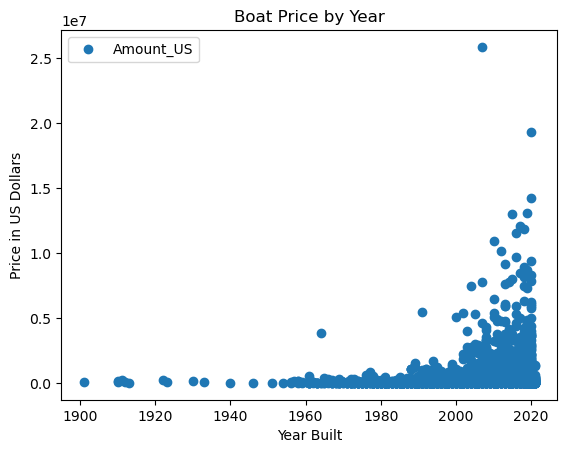

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_Built', y='Amount_US',style='o')
plt.title('Boat Price by Year')  
plt.xlabel('Year Built')  
plt.ylabel('Price in US Dollars')  
plt.show()

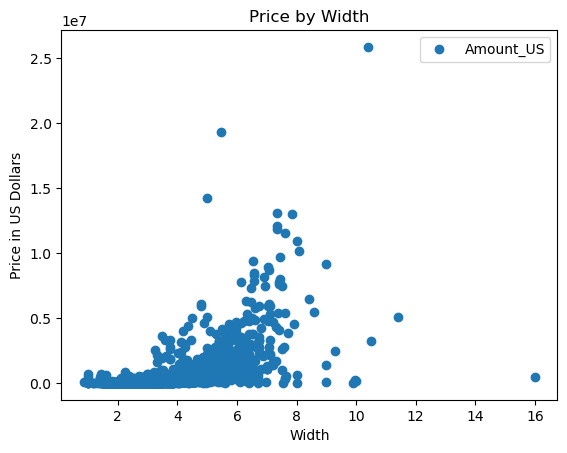

In [35]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Amount_US',style='o')
plt.title('Price by Width')  
plt.xlabel('Width')  
plt.ylabel('Price in US Dollars')  
plt.show()

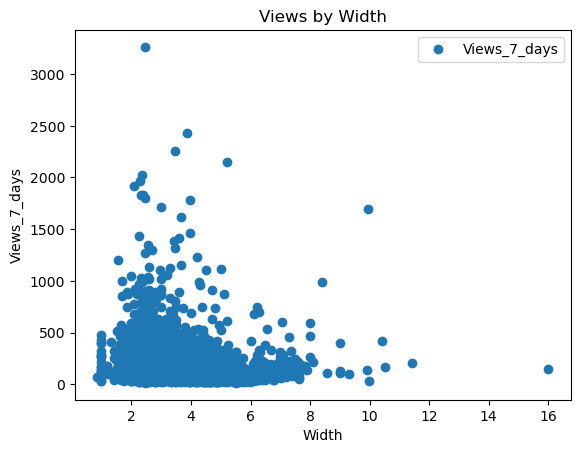

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Views_7_days',style='o') 
plt.title('Views by Width')  
plt.xlabel('Width')  
plt.ylabel('Views_7_days')  
plt.show()

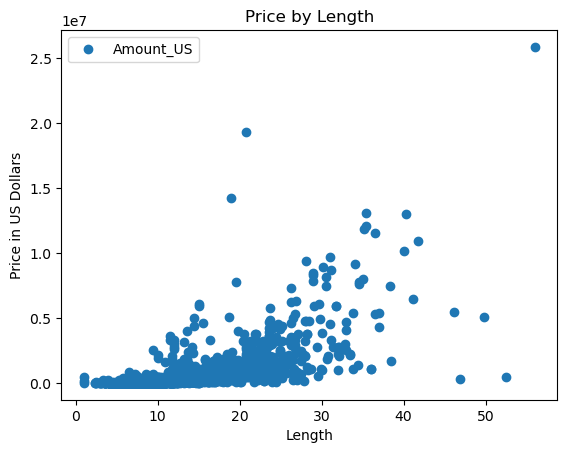

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Amount_US',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price by Length')  
plt.xlabel('Length')  
plt.ylabel('Price in US Dollars')  
plt.show()

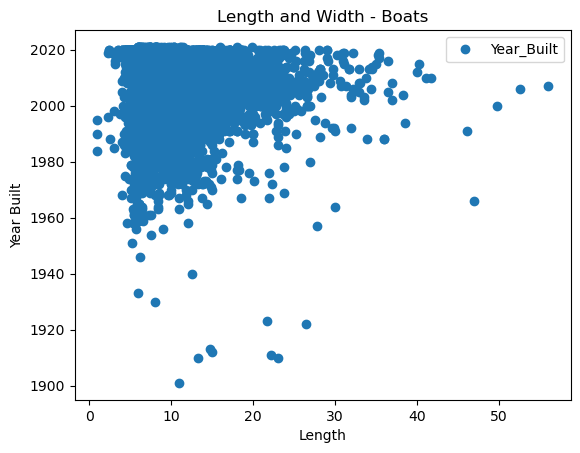

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Year_Built',style='o') 
plt.title('Length and Width - Boats')  
plt.xlabel('Length')  
plt.ylabel('Year Built')  
plt.show()

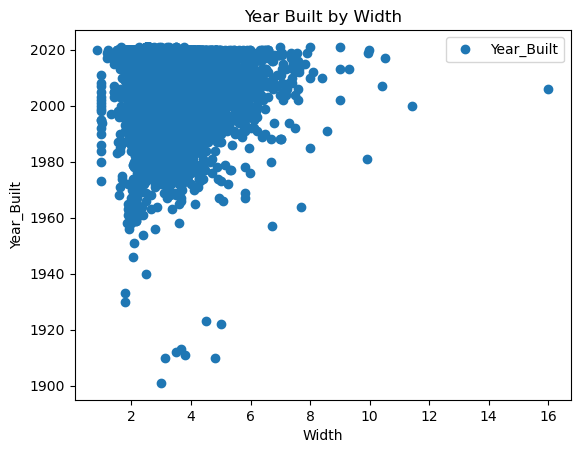

In [39]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Year_Built',style='o')
plt.title('Year Built by Width')  
plt.xlabel('Width')  
plt.ylabel('Year_Built')  
plt.show()

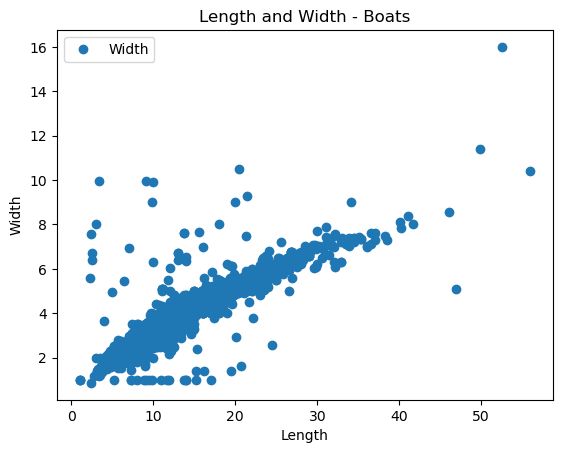

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Width',style='o')
plt.title('Length and Width - Boats')  
plt.xlabel('Length')  
plt.ylabel('Width')  
plt.show()

###### Hypothesis: As the Length of a boat increase, so it does its width. 

###### Ps: I only developed this hipothesys because this exercise uses numerical values and, as could be seen, there is no correlation between any numerical variable in this dataset. 

In [41]:
# For the sack of this exercise, I will use both columns 'length' and 'width', as they are the only ones could generate a good regression analysis. 

X = df['Length'].values.reshape(-1,1)
y = df['Width'].values.reshape(-1,1)

In [42]:
# Check variable

X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [43]:
# Check variable

y

array([[1.5 ],
       [1.46],
       [1.75],
       ...,
       [1.62],
       [1.8 ],
       [1.6 ]])

In [44]:
# create a training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [45]:
# create a regression obect 

regression = LinearRegression()

In [46]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# create a prediction of y value

y_predicted = regression.predict(X_test)

In [48]:
# check y predicted

y_predicted

array([[4.10074998],
       [3.51300234],
       [2.36982308],
       ...,
       [3.67054294],
       [3.57763438],
       [2.45465264]])

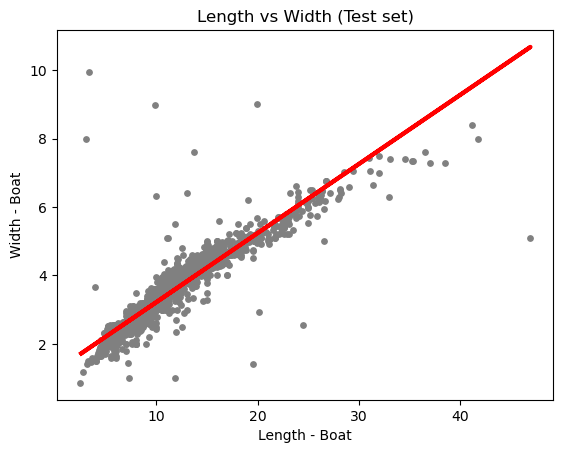

<Figure size 640x480 with 0 Axes>

In [49]:
# Create a visualization - regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Width (Test set)')
plot_test.xlabel('Length - Boat')
plot_test.ylabel('Width - Boat')
plot_test.show()

plot_test.savefig('LengthVsWidthTest.png') 

In [50]:
# create variables that contains model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # mean squared error based on y test and y predicted
r2 = r2_score(y_test, y_predicted) # r2 score based on y test and y predicted

In [51]:
# print model summary statistics

print('Slope:', regression.coef_) # How much the variable changes as X changes
print('Mean Squared Error:', rmse) # estimator that measures the average of the squared difference between the estimated values and the true values
print('R2 Score:', r2) #  how well the model explains the variance in the data

Slope: [[0.20197513]]
Mean Squared Error: 0.21747465694456508
R2 Score: 0.8319712860620565


In [52]:
# create a dataframe to compare actual and predicted - y value

df_difference = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_difference.head(20)

,Actual,Predicted
0,4.55,4.100750
1,3.96,3.513002
2,2.18,2.369823
3,2.88,3.157526
4,4.20,3.999762
5,5.21,5.819558
6,2.54,2.680865
7,3.99,3.795768
8,3.95,3.529160
9,4.20,3.624089


##### Analysis

###### According to the summary statistics above, as well as the dataframe, it is possible to confirm the following:

###### The slope is positive, so as the Length increase, so it does the Width. Important to highlight that this increase is low, 0.2 to be more precise.
###### Mean Squared Error is low, 0.212, which demonstrate that the difference between the estimated value and the true value is minimal. 
###### R2 Score on the other hand is 0.83, which is excellent, as it is really close to 1, indicating a good fit, with low variance. 

###### After the consideration above, it is necessary to compare the values between the y values and the y_predicted values. In this case it is possible to notice that there is a low differences between the y value and the y_predicted value, as well as most of the data points crowd around the regression line, proving that this model is good enough to prove the relationship between the variables 'Length' and 'Width'.

###### Furthermore, I do believe the model perfomed well in this case, showing that there is a strong correlation between the Length and the Width. But, although this relationship being strong, it does not have any connection with the Boat Price, the number of visits or the Year that was built. 

###### Thus, more analysis will be needed to reach a conclusion about what really affects the number of visits or value of a boat, for an example a multiple regression model would be a great option in this case to reach a conclusion. 

##### Comparison - Regression X Training Set

In [53]:
# Training Set - Prediction

y_predicted_training = regression.predict(X_train)

In [54]:
# check array

y_predicted_training

array([[4.0502562 ],
       [2.53140319],
       [6.03971126],
       ...,
       [4.23203382],
       [3.89877485],
       [3.96946614]])

In [55]:
# summary statistics

rmse = mean_squared_error(y_train, y_predicted_training)
r2 = r2_score(y_train, y_predicted_training)

In [56]:
# print summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20197513]]
Mean squared error:  0.19334931841207503
R2 score:  0.8469948863846433


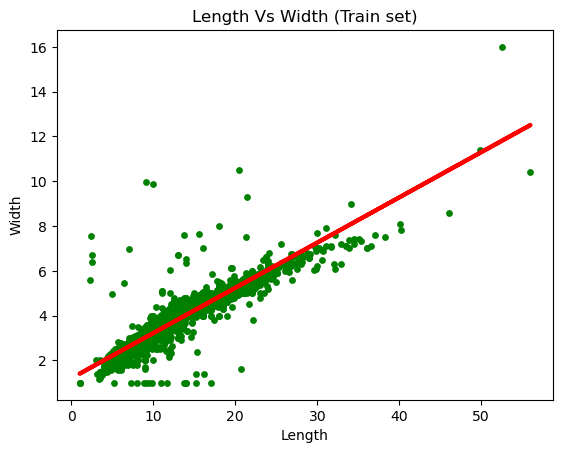

<Figure size 640x480 with 0 Axes>

In [57]:
# Training Sets Prediction - Visualization

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_training, color='red', linewidth =3)
plot_train.title('Length Vs Width (Train set)')
plot_train.xlabel('Length')
plot_train.ylabel('Width')
plot_train.show()

plot_train.savefig('LengthVsWidthTrain.png')

In [58]:
df.to_csv(os.path.join(path, 'Prepared_Data_Portfolio', '6.4_ExploratoryAnalysis.csv'), index=False)